In [815]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [816]:
os.getcwd()

'/workspace'

In [817]:
data = pd.read_csv('Crime_Clean.csv')

In [818]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [819]:
len(data)

235368

In [820]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [821]:
data = data.drop('City',1)

In [822]:
data = data[~data['Crime Name1'].isnull()]

In [823]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [824]:
data = data[data['Crime Name1'] != 'Other']

In [825]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2'],1)

In [826]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [827]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'High School %', 'Bachelors %',
       'Public Transportation %', 'Unemployed %'],
      dtype='object')

In [828]:
data.shape

(187827, 16)

In [829]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [830]:
places = data['Place'].value_counts().loc[lambda x: x > 8000]

top_places = list(places.index.values)

data = data[data['Place'].isin(top_places)]

In [831]:
data['Crime Name1'].value_counts()

Crime Against Property    53671
Crime Against Society     34684
Crime Against Person      11357
Not a Crime                1693
Name: Crime Name1, dtype: int64

In [832]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [833]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [834]:
data.shape

(99712, 30)

In [835]:
features = data[data.columns[~data.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Location','Start_Date_Time'])]]

In [836]:
classes = data['Crime Name1'].value_counts().loc[lambda x: x > 5000]

top_classes = list(classes.index.values)

data = data[data['Crime Name1'].isin(top_classes)]

In [837]:
top_classes = sorted(top_classes)
top_classes

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [838]:
num_classes= len(np.unique(labels))

In [839]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Crime Name1'] = le.fit_transform(data['Crime Name1'])

In [840]:
labels = np.array(data['Crime Name1'])
features1 = np.array(features)

In [841]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features1,labels,test_size=0.25,random_state=4)

In [842]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model1.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [843]:
predictions = model1.predict(test)

accuracy_score(test_labels, predictions)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7788430680359435

In [844]:
importances = list(model1.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Street - In vehicle                Importance: 0.45227304410966773
Variable: Victims                                  Importance: 0.07072734225161487
Variable: Place_Other/Unknown                      Importance: 0.06889014522887732
Variable: Place_Residence - Driveway               Importance: 0.06589615968676253
Variable: Place_Residence - Apartment/Condo        Importance: 0.04967228369936035
Variable: Place_Parking Lot - Residential          Importance: 0.04530847816071905
Variable: Place_Residence - Single Family          Importance: 0.037299123531180714
Variable: Place_Street - Residential               Importance: 0.034541533267272245
Variable: Income                                   Importance: 0.02807934903656868
Variable: Age                                      Importance: 0.022784340673453463
Variable: High School %                            Importance: 0.02273694238514858
Variable: Public Transportation %                  Importance: 0.021923642755233126


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [845]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Street - In vehicle', 'Victims', 'Place_Other/Unknown', 'Place_Residence - Driveway', 'Place_Residence - Apartment/Condo', 'Place_Parking Lot - Residential', 'Place_Residence - Single Family', 'Place_Street - Residential', 'Income']
[0.45227304410966773, 0.07072734225161487, 0.06889014522887732, 0.06589615968676253, 0.04967228369936035, 0.04530847816071905, 0.037299123531180714, 0.034541533267272245, 0.02807934903656868]


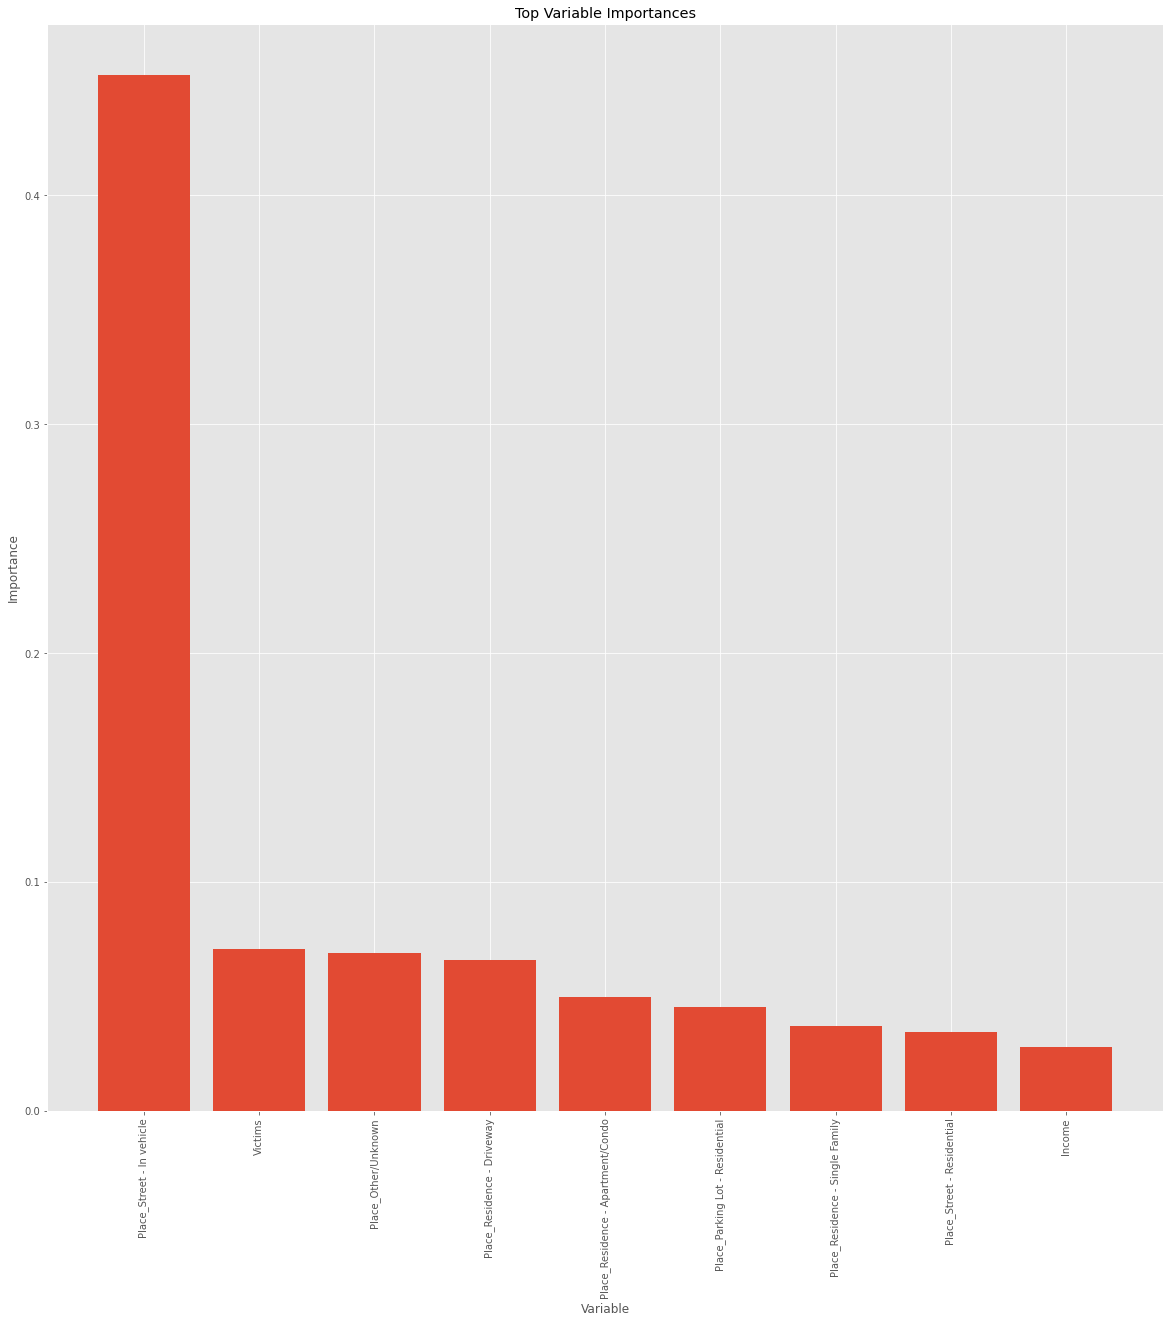

In [846]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [847]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(20,20)

Confusion matrix, without normalization


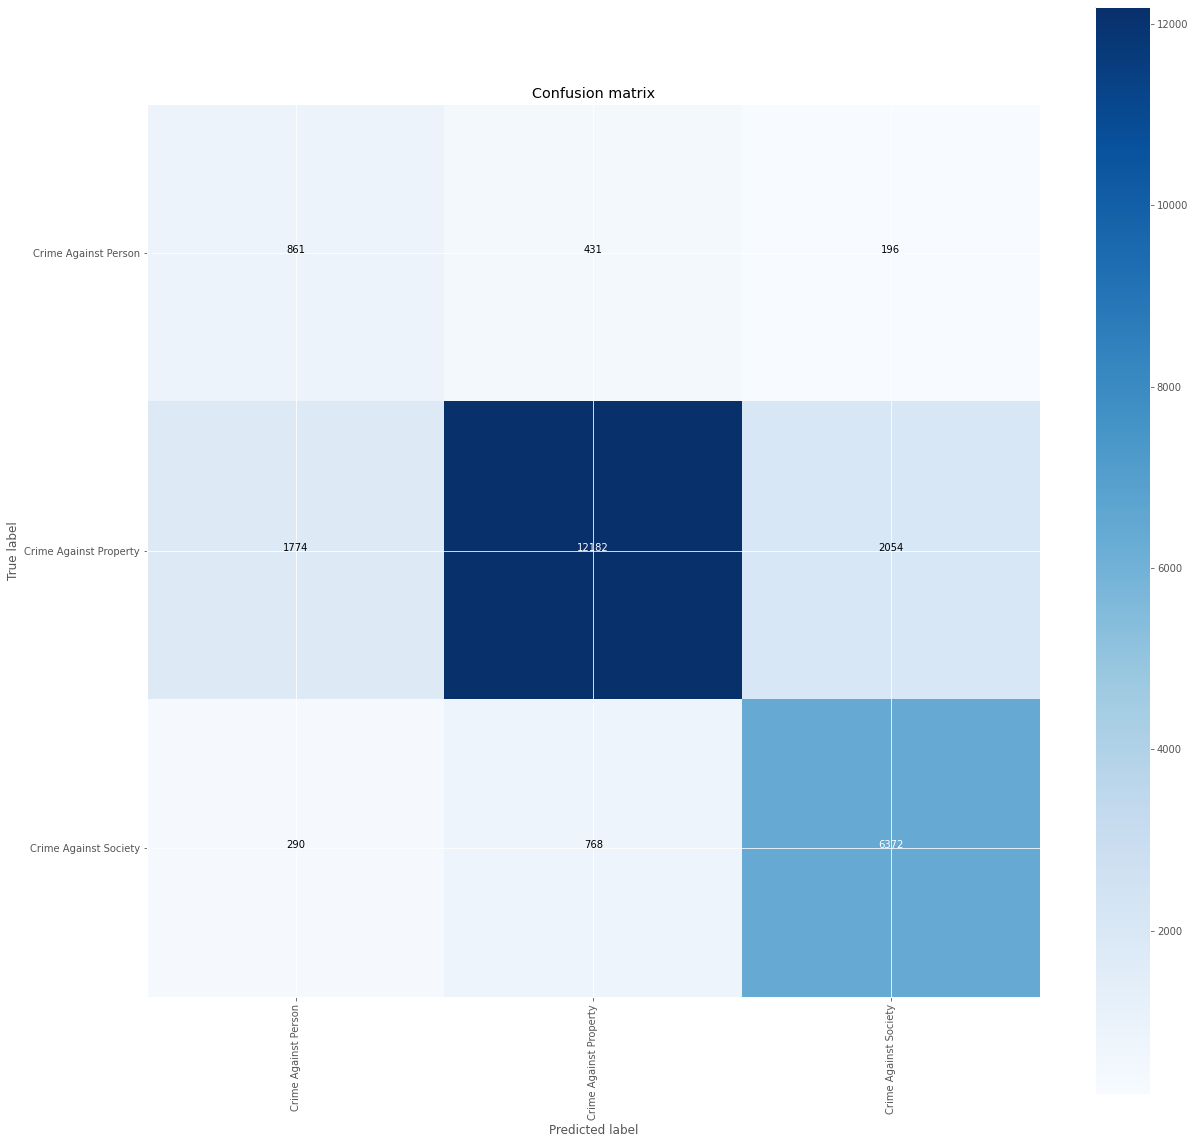

In [848]:
from sklearn.metrics import confusion_matrix

cfn_matrix = confusion_matrix(predictions, test_labels)

disp = plot_confusion_matrix(cfn_matrix, top_classes)

In [849]:
data = data.drop(['Crime Name1'], 1)

In [850]:
data['Crime Name3'].value_counts().loc[lambda x: (x < 1000) & (x > 300)]

FRAUD - SWINDLE                                      789
PUBLIC PEACE - DISORDERLY CONDUCT                    775
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           735
PUBLIC PEACE - HARASSING COMMUNICATION               728
TRESPASSING                                          687
RAPE - STRONG-ARM                                    618
ALL OTHER OFFENSES                                   589
DRUGS - MARIJUANA - SELL                             510
DRIVING UNDER THE INFLUENCE DRUGS                    504
FORGERY OF CHECKS                                    479
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)    477
DRUGS - OPIUM OR DERIVATIVE - POSSESS                442
ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON           411
DRUGS - COCAINE - SELL                               377
ASSAULT - AGGRAVATED - NON-FAMILY-OTHER WEAPON       366
WEAPON - POSSESSION                                  363
LIQUOR (DESCRIBE OFFENSE)                            314
WEAPON - CONCEALED             

In [851]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                       15916
DRUGS - MARIJUANA - POSSESS               10427
DRIVING UNDER THE INFLUENCE LIQUOR        10276
ASSAULT - 2ND DEGREE                       6282
DAMAGE PROPERTY - PRIVATE                  5946
IDENTITY THEFT                             4236
LARCENY (DESCRIBE OFFENSE)                 3252
LARCENY - AUTO PARTS                       2913
AUTO THEFT - VEHICLE THEFT                 2749
FRAUD - ILLEGAL USE CREDIT CARDS           2236
LARCENY - FROM BLDG                        2185
BURGLARY - FORCED ENTRY-RESIDENTIAL        2095
DAMAGE PROPERTY (DESCRIBE OFFENSE)         1722
FRAUD (DESCRIBE OFFENSE)                   1491
ASSAULT - SIMPLE                           1405
FRAUD - IMPERSONATION                      1295
BURGLARY - NO FORCED ENTRY-RESIDENTIAL     1294
FRAUD - CONFIDENCE GAME                    1168
DRUGS - NARCOTIC EQUIP - POSSESS           1072
DRUGS - COCAINE - POSSESS                  1061
LIQUOR - POSSESS                        

In [852]:
import re

In [853]:
pattern1 = r'.*\s*(ASSAULT)\.*'
pattern2 = r'.*\s*(DRUGS)\.*'
pattern3 = r'.*\s*(INFLUENCE)\.*'
pattern4 = r'.*\s*(FRAUD|IDENTITY|FORGERY)\.*'
pattern5 = r'.*\s*(DAMAGE PROPERTY)\.*'
pattern6 = r'.*\s*(FROM AUTO)\.*'
pattern7 = r'.*\s*(AUTO PARTS|AUTO THEFT)\.*'


for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'DUI'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Fraud'
    elif re.match(pattern5, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Property Damage'
    elif re.match(pattern6, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Theft from Vehicle'
    elif re.match(pattern7, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Theft of Auto Parts/Vehicle'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'
        
                                            

In [854]:
data['Crime Type'].value_counts()

All Other Offenses             20866
Drugs                          16318
Theft from Vehicle             15916
Fraud                          12347
DUI                            10276
Assault                        10276
Property Damage                 7979
Theft of Auto Parts/Vehicle     5734
Name: Crime Type, dtype: int64

In [855]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

LARCENY (DESCRIBE OFFENSE)                            3252
LARCENY - FROM BLDG                                   2185
BURGLARY - FORCED ENTRY-RESIDENTIAL                   2095
BURGLARY - NO FORCED ENTRY-RESIDENTIAL                1294
LIQUOR - POSSESS                                      1025
PUBLIC PEACE - DISORDERLY CONDUCT                      775
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER             735
PUBLIC PEACE - HARASSING COMMUNICATION                 728
TRESPASSING                                            687
RAPE - STRONG-ARM                                      618
ALL OTHER OFFENSES                                     589
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)      477
WEAPON - POSSESSION                                    363
LIQUOR (DESCRIBE OFFENSE)                              314
WEAPON - CONCEALED                                     312
LARCENY - POSTAL                                       305
ROBBERY - STREET-STRONG-ARM                            2

In [856]:
data2 = data[data['Crime Type'] != 'All Other Offenses']
data2['Crime Type'].value_counts()

Drugs                          16318
Theft from Vehicle             15916
Fraud                          12347
Assault                        10276
DUI                            10276
Property Damage                 7979
Theft of Auto Parts/Vehicle     5734
Name: Crime Type, dtype: int64

In [857]:
classes = data2['Crime Type'].value_counts().loc[lambda x: x > 5000]

top_classes = list(classes.index.values)

data2 = data2[data2['Crime Type'].isin(top_classes)]

In [858]:
data['Crime Type'].value_counts()

All Other Offenses             20866
Drugs                          16318
Theft from Vehicle             15916
Fraud                          12347
DUI                            10276
Assault                        10276
Property Damage                 7979
Theft of Auto Parts/Vehicle     5734
Name: Crime Type, dtype: int64

In [859]:
top_classes = sorted(top_classes)
top_classes

['Assault',
 'DUI',
 'Drugs',
 'Fraud',
 'Property Damage',
 'Theft from Vehicle',
 'Theft of Auto Parts/Vehicle']

In [860]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data2['Crime Type'] = le.fit_transform(data2['Crime Type'])

In [861]:
features = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [862]:
features.shape

(78846, 24)

In [863]:
data2['Crime Type'].value_counts()

2    16318
5    15916
3    12347
1    10276
0    10276
4     7979
6     5734
Name: Crime Type, dtype: int64

In [864]:
labels = np.array(data2['Crime Type'])
features1 = np.array(features)

In [865]:
features1[0]

array([1.00000000e+00, 1.93100000e+03, 2.22619000e+05, 4.87000000e+01,
       1.60633484e-01, 3.13725490e-01, 6.58174098e-02, 4.88687783e-02,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [866]:
labels[0]

3

In [867]:
len(np.unique(labels))

7

In [868]:
num_classes= len(np.unique(labels))

In [869]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features1,labels,test_size=0.25,random_state=4)

In [870]:
train.shape

(59134, 24)

In [871]:
test.shape

(19712, 24)

In [872]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [873]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test, test_labels, model)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.2028713582554445


(array([ 7733.,     0.,     0.,  7654.,     0.,     0., 12319.,     0.,
            0.,     0.,  9209.,     0.,     0.,  6012.,     0.,     0.,
        11951.,     0.,     0.,  4256.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

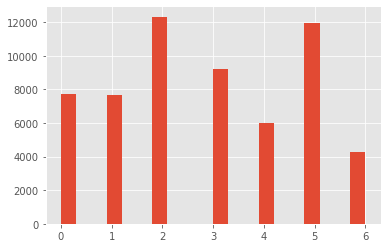

In [874]:
plt.hist(train_labels, bins=20)

In [875]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train, train_labels)

(array([12319.,     0.,     0., 12319.,     0.,     0., 12319.,     0.,
            0.,     0., 12319.,     0.,     0., 12319.,     0.,     0.,
        12319.,     0.,     0., 12319.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

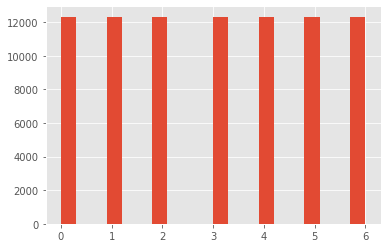

In [876]:
plt.hist(y_sm, bins=20)

In [877]:
smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train, train_labels)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([ 7733.,     0.,     0.,  7654.,     0.,     0., 12319.,     0.,
            0.,     0.,  9209.,     0.,     0.,  6012.,     0.,     0.,
        11951.,     0.,     0., 12319.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

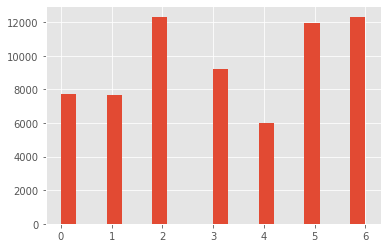

In [878]:
plt.hist(y_sm2, bins=20)

In [879]:
under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train, train_labels)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([ 7733.,     0.,     0.,  7654.,     0.,     0.,  4256.,     0.,
            0.,     0.,  9209.,     0.,     0.,  6012.,     0.,     0.,
        11951.,     0.,     0.,  4256.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

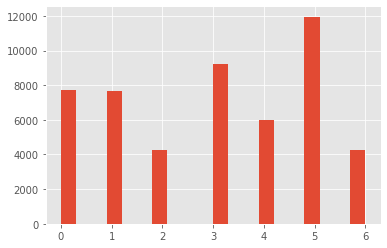

In [880]:
plt.hist(Y_u, bins=20)

In [881]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model1.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [882]:
from sklearn.metrics import accuracy_score

predictions = model1.predict(test)

print("Accuracy: " + str(accuracy_score(test_labels, predictions)))

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.5634638798701299


In [883]:
model1.fit(X_sm,y_sm)

predictions2 = model1.predict(test)

accuracy_score(test_labels, predictions2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.537692775974026

In [884]:
model1.fit(X_sm2,y_sm2)

predictions3 = model1.predict(test)

accuracy_score(test_labels, predictions3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.549310064935065

In [885]:
model1.fit(X_u, Y_u)

predictions4 = model1.predict(test)

accuracy_score(test_labels, predictions4)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5385044642857143

In [886]:
importances = list(model1.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Other/Unknown                      Importance: 0.2165988524094372
Variable: Place_Street - In vehicle                Importance: 0.17883106195572965
Variable: Place_Residence - Driveway               Importance: 0.08992944166439568
Variable: Place_Residence - Apartment/Condo        Importance: 0.0744351571502205
Variable: Place_Residence - Single Family          Importance: 0.05494239905244194
Variable: Victims                                  Importance: 0.04695862233253098
Variable: Place_Parking Lot - Residential          Importance: 0.045248812970111026
Variable: Place_Street - Residential               Importance: 0.04014059526858245
Variable: Income                                   Importance: 0.03811939808182094
Variable: Age                                      Importance: 0.034191881829665
Variable: High School %                            Importance: 0.03289959999139956
Variable: Public Transportation %                  Importance: 0.031154419841180683
Variab

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [887]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Other/Unknown', 'Place_Street - In vehicle', 'Place_Residence - Driveway', 'Place_Residence - Apartment/Condo', 'Place_Residence - Single Family', 'Victims', 'Place_Parking Lot - Residential', 'Place_Street - Residential', 'Income', 'Age', 'High School %', 'Public Transportation %', 'Bachelors %', 'Pop', 'Unemployed %']
[0.2165988524094372, 0.17883106195572965, 0.08992944166439568, 0.0744351571502205, 0.05494239905244194, 0.04695862233253098, 0.045248812970111026, 0.04014059526858245, 0.03811939808182094, 0.034191881829665, 0.03289959999139956, 0.031154419841180683, 0.03073250717140609, 0.02956008483725319, 0.028154783636746755]


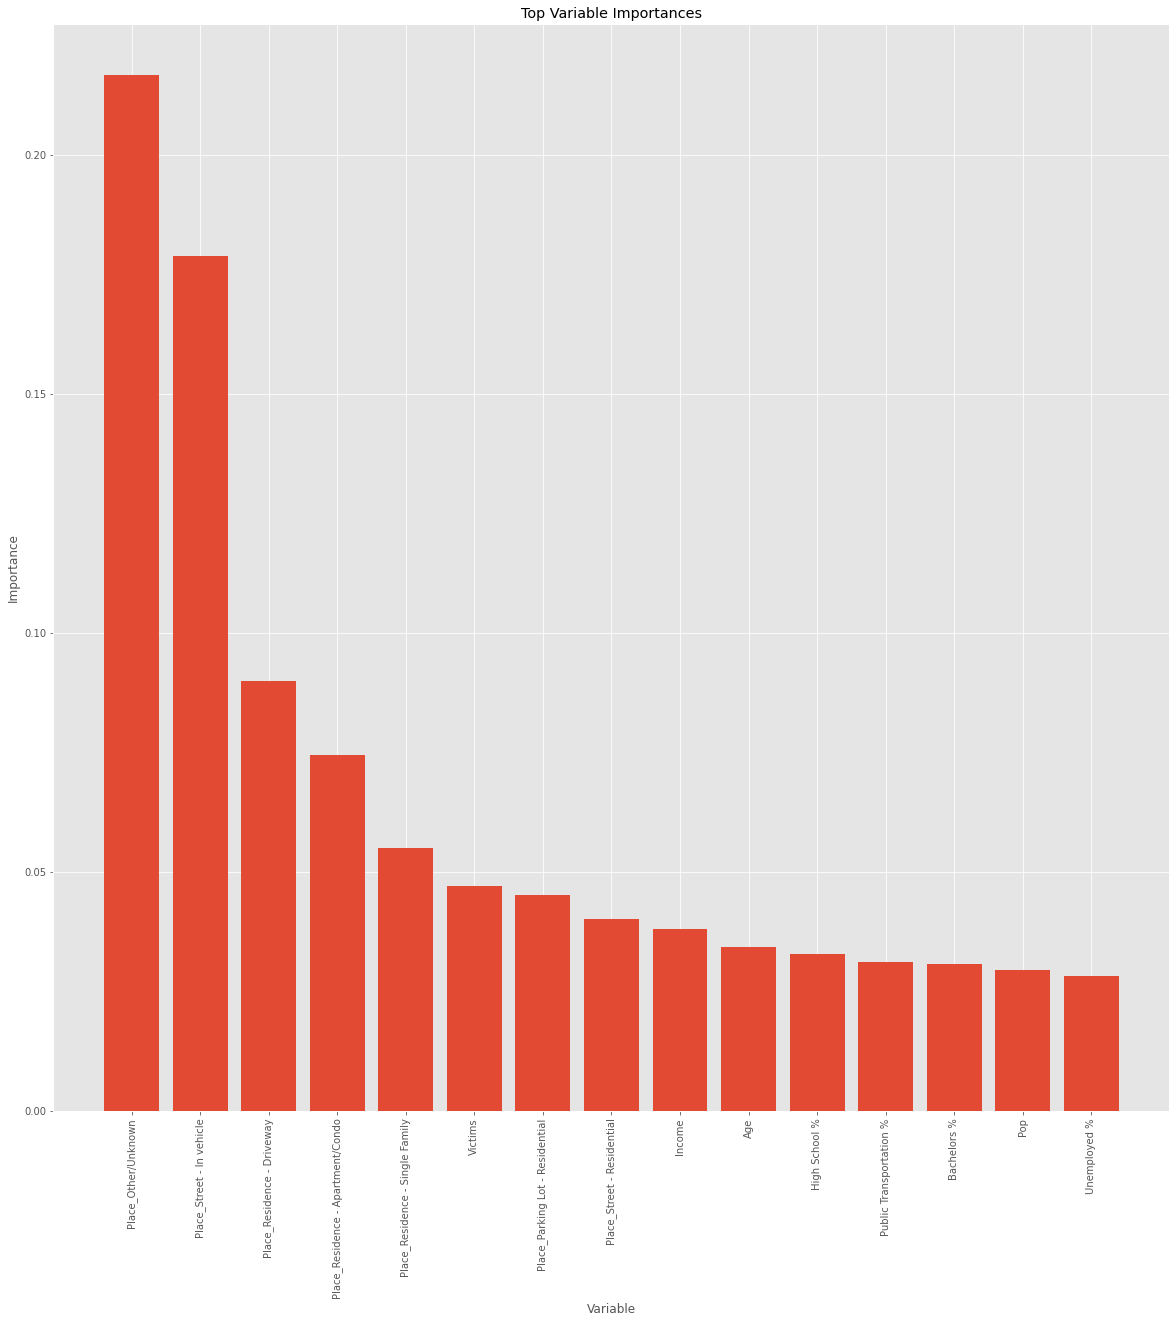

In [888]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [889]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(20,20)

Confusion matrix, without normalization


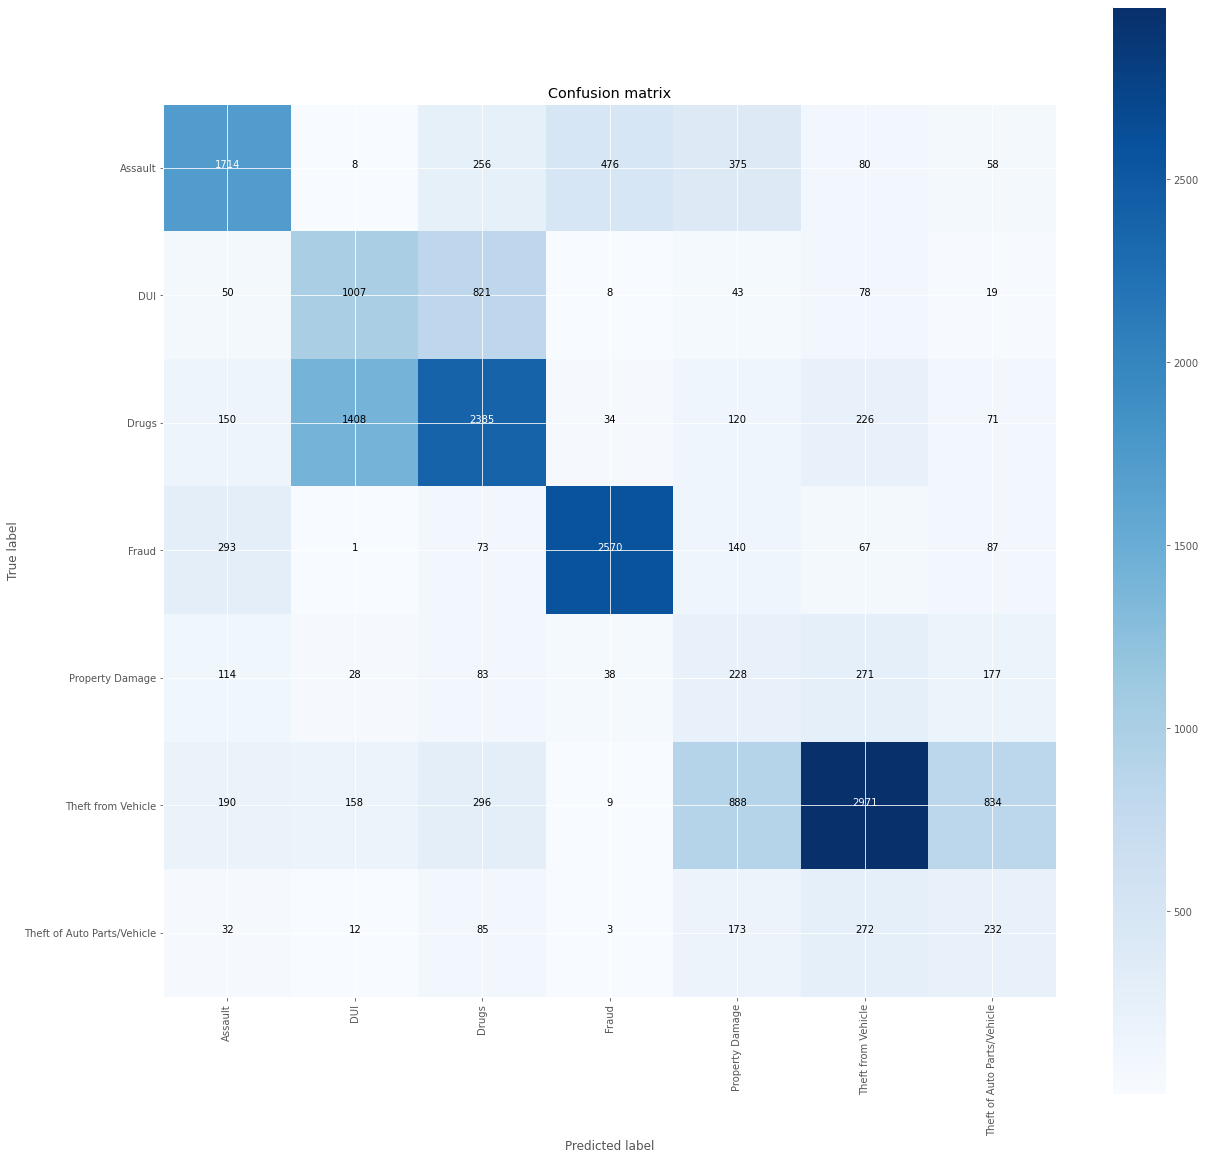

In [890]:
from sklearn.metrics import confusion_matrix

cfn_matrix = confusion_matrix(predictions, test_labels)

disp = plot_confusion_matrix(cfn_matrix, top_classes)

In [891]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [892]:
print(rs.best_params_)

{'n_estimators': 33, 'min_samples_split': 2, 'max_leaf_nodes': 47, 'max_features': 0.6, 'max_depth': 16, 'bootstrap': False}


In [893]:
best_model = rs.best_estimator_

In [894]:
best_model.fit(train,train_labels)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features=0.6,
                       max_leaf_nodes=47, n_estimators=33, random_state=4)

In [895]:
predictions2 = best_model.predict(test)
accuracy_score(test_labels, predictions2)

0.5657467532467533

In [896]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.34912990772581454
Variable: Place_Other/Unknown                      Importance: 0.261295865993348
Variable: Place_Residence - Driveway               Importance: 0.09083339135506031
Variable: Place_Residence - Apartment/Condo        Importance: 0.07839880536902266
Variable: Place_Residence - Single Family          Importance: 0.07654645994475186
Variable: Victims                                  Importance: 0.05021232955669875
Variable: Place_Street - Residential               Importance: 0.029539415428386152
Variable: Place_Parking Lot - Residential          Importance: 0.021773110118185716
Variable: Income                                   Importance: 0.009590581384846428
Variable: High School %                            Importance: 0.007023833362640796
Variable: Police District Name_BETHESDA            Importance: 0.00436706963311117
Variable: Age                                      Importance: 0.0035215675406837445


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [897]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Other/Unknown',
 'Place_Residence - Driveway',
 'Place_Residence - Apartment/Condo',
 'Place_Residence - Single Family',
 'Victims',
 'Place_Street - Residential']

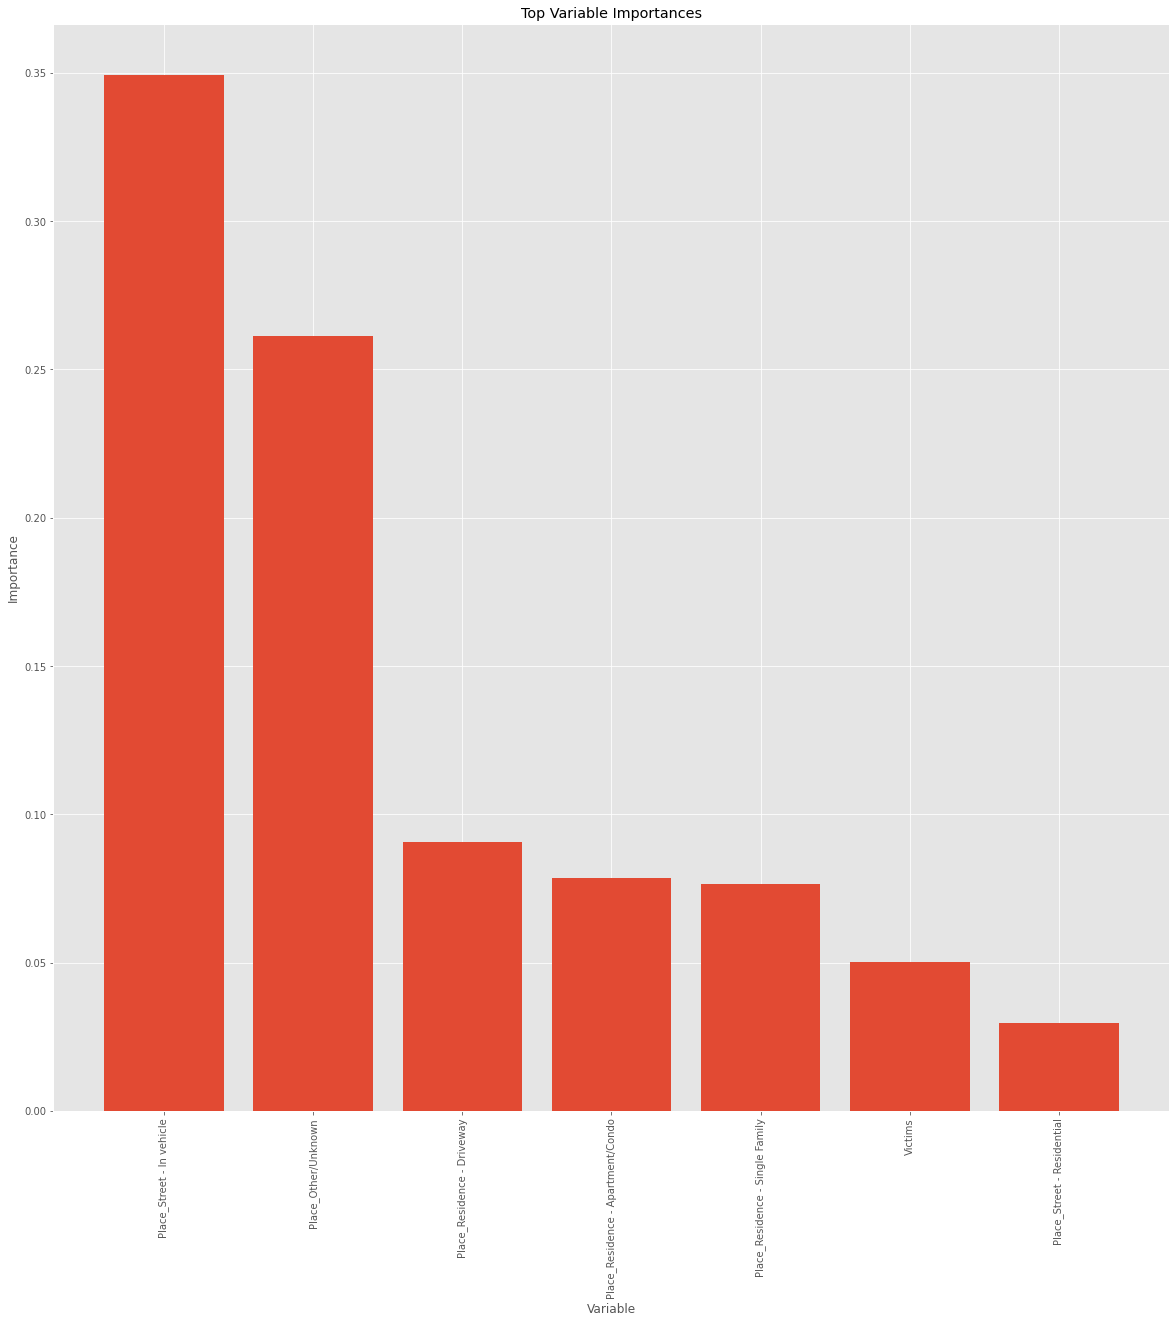

In [898]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Confusion matrix, without normalization


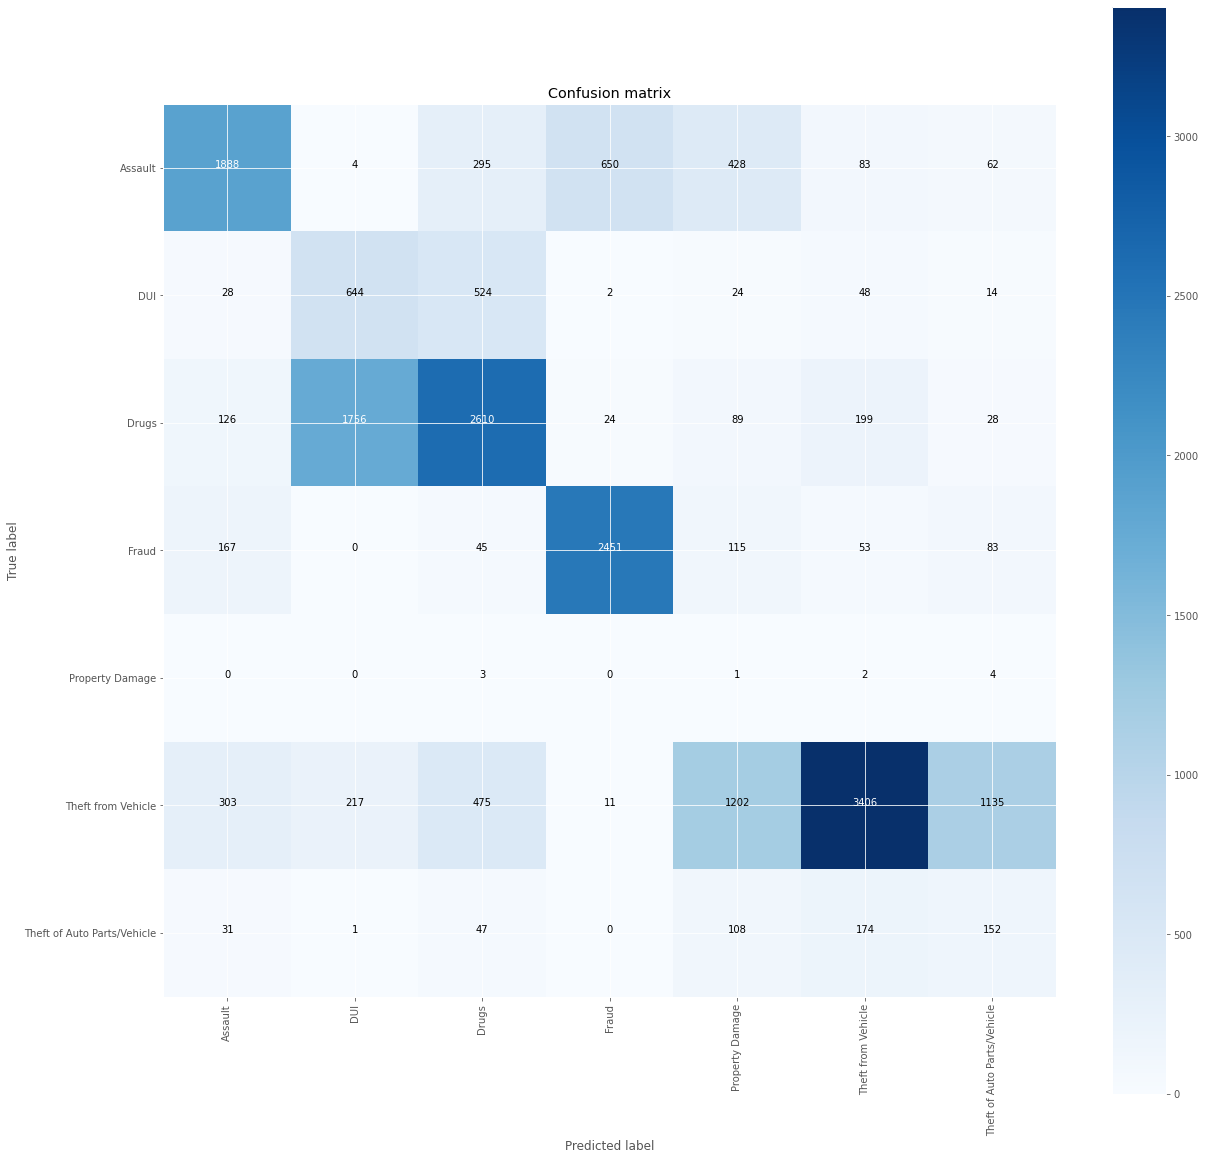

In [899]:
cfn_matrix2 = confusion_matrix(predictions2, test_labels)

disp2 = plot_confusion_matrix(cfn_matrix2, classes=top_classes)

In [900]:
classes2 = data['Crime Name3'].value_counts().loc[lambda x: x > 6000]

top_classes2 = list(classes2.index.values)

data3 = data2[data2['Crime Name3'].isin(top_classes2)]

In [901]:
len(data3)

42901

In [902]:
data3['Crime Name3'].value_counts()

LARCENY - FROM AUTO                   15916
DRUGS - MARIJUANA - POSSESS           10427
DRIVING UNDER THE INFLUENCE LIQUOR    10276
ASSAULT - 2ND DEGREE                   6282
Name: Crime Name3, dtype: int64

In [903]:
top_classes2 = sorted(top_classes2)
top_classes2

['ASSAULT - 2ND DEGREE',
 'DRIVING UNDER THE INFLUENCE LIQUOR',
 'DRUGS - MARIJUANA - POSSESS',
 'LARCENY - FROM AUTO']

In [904]:
le = preprocessing.LabelEncoder()
data3['Crime Name3'] = le.fit_transform(data3['Crime Name3'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [905]:
features2 = data3[data3.columns[~data3.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [906]:
labels2 = np.array(data3['Crime Name3'])
features2 = np.array(features2)

In [907]:
num_classes= len(np.unique(labels2))

In [908]:
train2, test2, train_labels2, test_labels2 = train_test_split(features2,labels2,test_size=0.25,random_state=4)

In [909]:
model2 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model2.fit(train2,train_labels2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [910]:
predictions_new = model2.predict(test2)

print("Accuracy: " + str(accuracy_score(test_labels2, predictions_new)))

Accuracy: 0.6962520977065075


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [911]:
importances3 = list(model2.feature_importances_)
feature_list3 = list(features.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances3]

Variable: Place_Street - In vehicle                Importance: 0.30776211072933773
Variable: Place_Residence - Driveway               Importance: 0.12236890388456716
Variable: Place_Residence - Apartment/Condo        Importance: 0.11253362974239127
Variable: Place_Residence - Single Family          Importance: 0.06379677185531753
Variable: Place_Parking Lot - Residential          Importance: 0.06184192041333236
Variable: Place_Street - Residential               Importance: 0.05089191259302873
Variable: Victims                                  Importance: 0.04759092788638124
Variable: Income                                   Importance: 0.03639986204158782
Variable: Age                                      Importance: 0.031258425203202114
Variable: High School %                            Importance: 0.028552843071834148
Variable: Bachelors %                              Importance: 0.026785841071607287
Variable: Public Transportation %                  Importance: 0.026734154737744324


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [912]:
top_importances3 = []
top_features_list3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)
top_features_list3

['Place_Street - In vehicle',
 'Place_Residence - Driveway',
 'Place_Residence - Apartment/Condo',
 'Place_Residence - Single Family',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential',
 'Victims',
 'Income',
 'Age',
 'High School %',
 'Bachelors %',
 'Public Transportation %',
 'Pop',
 'Unemployed %']

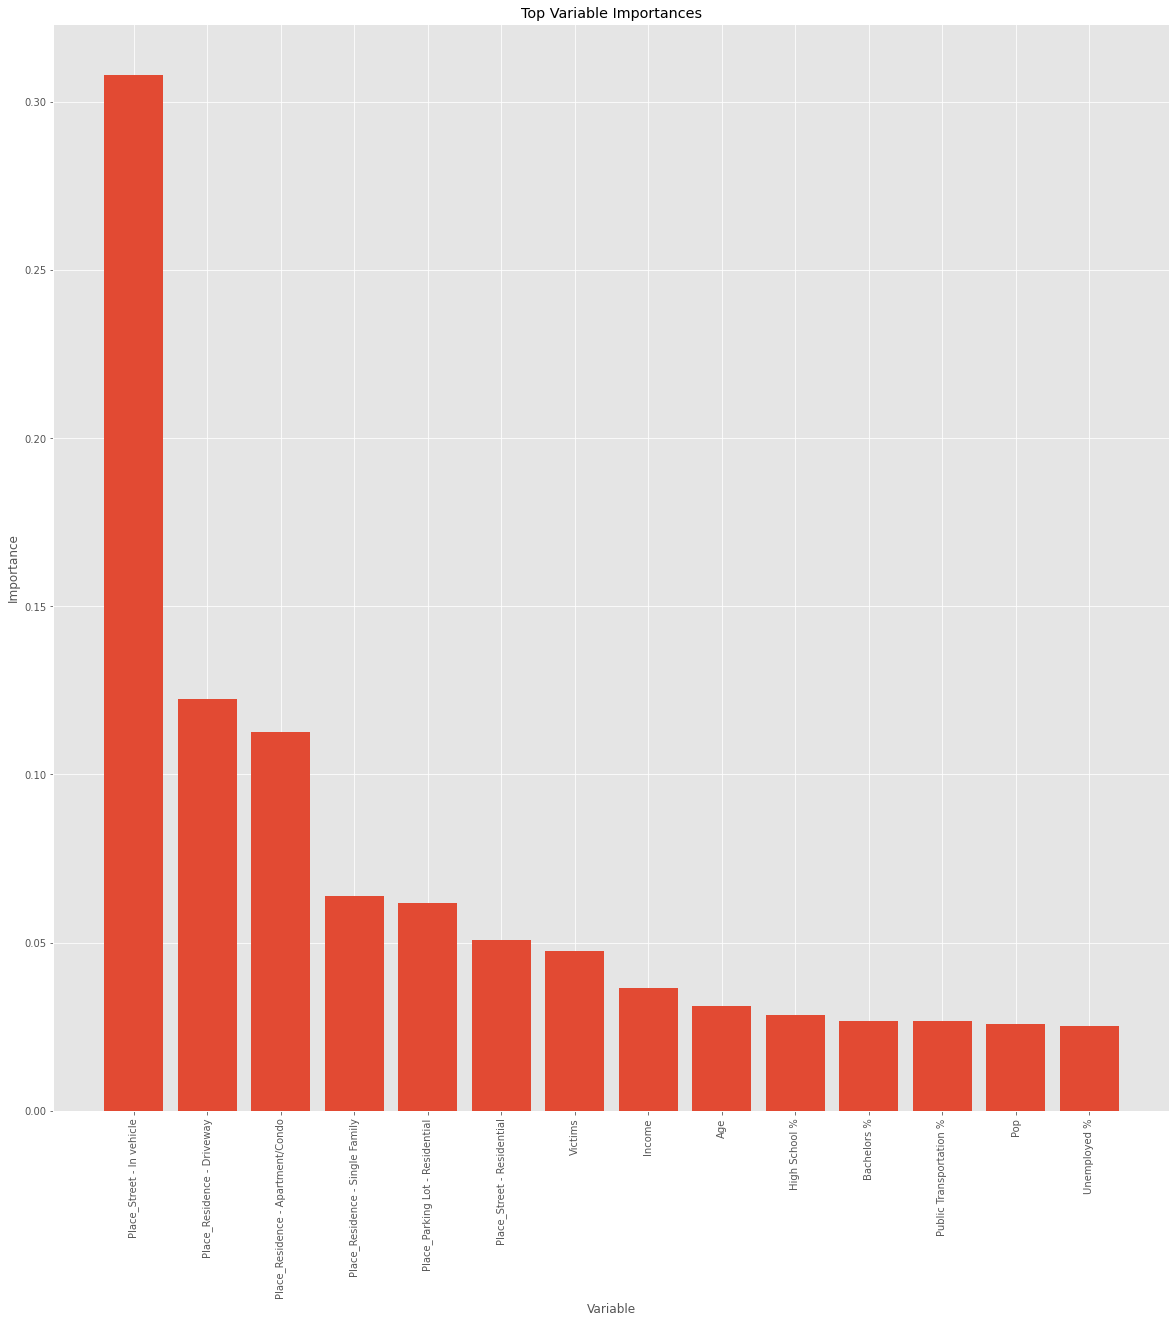

In [913]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Confusion matrix, without normalization


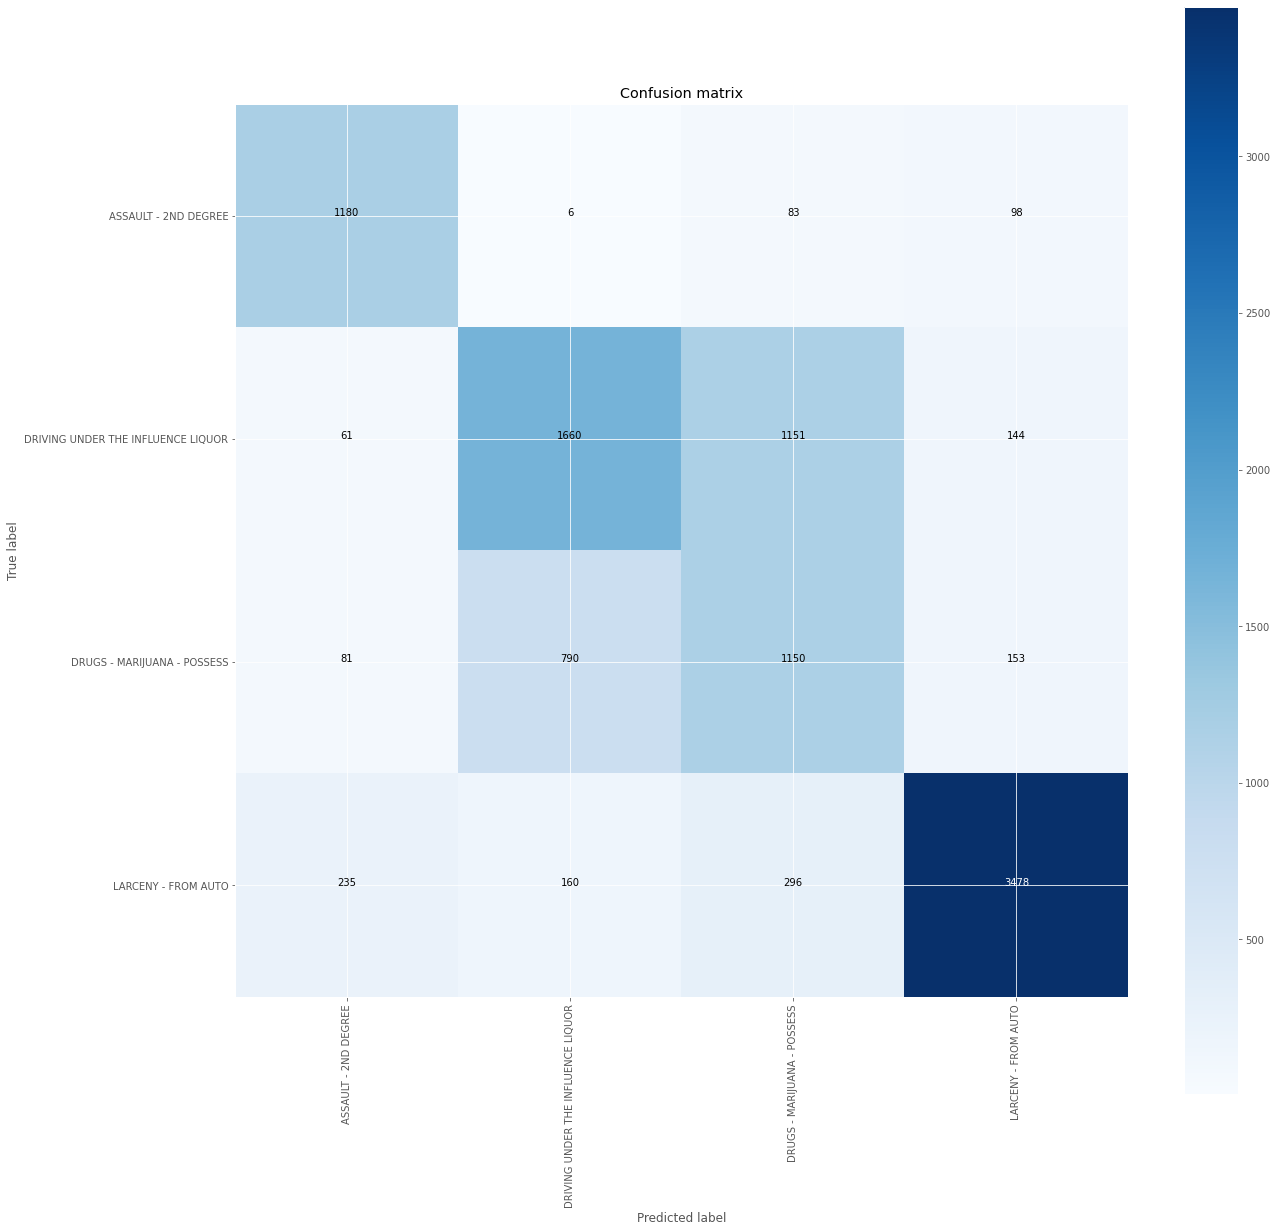

In [914]:
cfn_matrix3 = confusion_matrix(predictions_new, test_labels2)

disp3 = plot_confusion_matrix(cfn_matrix3, classes=top_classes2)